In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from UliPlot.XLSX import auto_adjust_xlsx_column_width


In [2]:
contaminants_i_nutrients = ["Ciprofloxacina", "Clorobenzè", "Hexabromociclodecà", "Nonilfenols", "Octilfenols", "Tetracloroetilè", "Triclorometà", "Cloroalcans", "Niquel dissolt", "Plom dissolt", "Diuron"]


In [3]:
df = pd.read_csv("C://Users//jsalo//Desktop//resultats.csv")




In [4]:
listObj = []

for string in list(df['escenari']):
    listObj.append(eval(string))

In [5]:
def f(x):
    incompliments = 0
    for massa in x["masses_aigua_valors"]:
        incompliments += len(x["masses_aigua_valors"][massa])
    return incompliments, x["cost"]

data_sorted = sorted(listObj, key=lambda x: f(x))

In [27]:
def has_no_gac(scenario):
    configuration = scenario['scenario']
    return sum(1 for _ in filter(lambda edar: edar['terciaris'] == ['GAC'], configuration)) == 0


In [29]:
data_sorted = list(filter(has_no_gac, data_sorted))

In [30]:
data_sorted

[{'scenario': ({'secundari': 'SP',
    'terciaris': ['O3', 'SF'],
    'wwtp': 'ES9080010001010E'},
   {'secundari': 'SN', 'terciaris': None, 'wwtp': 'ES9080910001010E'},
   {'secundari': 'SP',
    'terciaris': ['O3', 'SF', 'UV'],
    'wwtp': 'ES9083020001010E'},
   {'secundari': 'SP',
    'terciaris': ['O3', 'GAC', 'UV'],
    'wwtp': 'ES9081130006010E'},
   {'secundari': 'SP', 'terciaris': None, 'wwtp': 'ES9081140002010E'},
   {'secundari': 'SN', 'terciaris': None, 'wwtp': 'ES9081270001010E'},
   {'secundari': 'SP',
    'terciaris': ['O3', 'GAC', 'UV'],
    'wwtp': 'ES9081840001010E'},
   {'secundari': 'SP', 'terciaris': None, 'wwtp': 'ES9082110001010E'},
   {'secundari': 'SP',
    'terciaris': ['O3', 'GAC', 'UV'],
    'wwtp': 'ES9082790004050E'}),
  'masses_aigua_valors': {1000950: ['Hexabromociclodecà', 'Octilfenols'],
   1000900: ['Hexabromociclodecà', 'Octilfenols'],
   1000940: [],
   1000930: ['Octilfenols'],
   1000860: ['Octilfenols'],
   1000920: [],
   1000910: ['Ciprofloxaci

In [31]:
configuracions = []
incompliments_masses = []
incompliment_contaminant = []


In [32]:
i = 0
for obj in data_sorted:
    i += 1
    scenario = obj['scenario']
    masses_aigua = obj['masses_aigua_valors']
    cost = obj['cost']

    obj = {}
    for edar in scenario:
        tractaments = "P,"+edar["secundari"]
        if edar["terciaris"] is not None:
            tractaments = tractaments+','+','.join(edar["terciaris"])
        
        obj[edar["wwtp"]] = tractaments
    obj["Cost diferencial"] = cost
    incompliments_masses.append(masses_aigua)
    n_incompliments = 0
    incompliment_per_contaminant = {}

    for massa_aigua in masses_aigua:
    #for contaminant in masses_aigua[massa_aigua]:
        for contaminant in contaminants_i_nutrients:
            if contaminant not in incompliment_per_contaminant:
                incompliment_per_contaminant[contaminant] = 0
            if contaminant in masses_aigua[massa_aigua]:
                incompliment_per_contaminant[contaminant] += 1
                n_incompliments += 1
    incompliment_contaminant.append(incompliment_per_contaminant)
    obj["Nombre incompliments"] = n_incompliments
    configuracions.append(obj)


In [33]:
df = pd.DataFrame(incompliment_contaminant)

In [37]:
df.head(4)

,Ciprofloxacina,Clorobenzè,Hexabromociclodecà,Nonilfenols,Octilfenols,Tetracloroetilè,Triclorometà,Cloroalcans,Niquel dissolt,Plom dissolt,Diuron
0,2,0,14,0,18,0,1,3,2,3,0
1,2,0,14,0,18,0,1,3,2,3,0
2,2,0,14,0,18,0,1,3,2,3,0
3,2,0,14,0,18,0,1,3,2,3,0


In [35]:
incompliments_escenari_base = 56

In [47]:
for i in range(0,4):
    print(configuracions[i]['ES9080010001010E'])
    print(configuracions[i]['ES9080910001010E'])
    print(configuracions[i]['ES9083020001010E'])
    print(configuracions[i]['ES9081130006010E'])
    print(configuracions[i]['ES9081140002010E'])
    print(configuracions[i]['ES9081270001010E'])
    print(configuracions[i]['ES9081840001010E'])
    print(configuracions[i]['ES9082110001010E'])
    print(configuracions[i]['ES9082790004050E'])
    print('------------')

    

P,SP,O3,SF
P,SN
P,SP,O3,SF,UV
P,SP,O3,GAC,UV
P,SP
P,SN
P,SP,O3,GAC,UV
P,SP
P,SP,O3,GAC,UV
------------
P,SP,O3,SF,UV
P,SN
P,SP,O3,SF
P,SP,O3,GAC,UV
P,SP
P,SN
P,SP,O3,GAC,UV
P,SP
P,SP,O3,GAC,UV
------------
P,SP,O3,SF
P,SN,SF,UV
P,SP,O3,SF,UV
P,SP,O3,GAC,UV
P,SP
P,SN
P,SP,O3,GAC,UV
P,SP
P,SP,O3,GAC,UV
------------
P,SP,O3,SF
P,SN,SF,UV
P,SP,O3,SF,UV
P,SP,O3,GAC,UV
P,SP
P,SN,SF,UV
P,SP,O3,GAC,UV
P,SP
P,SP,O3,GAC,UV
------------


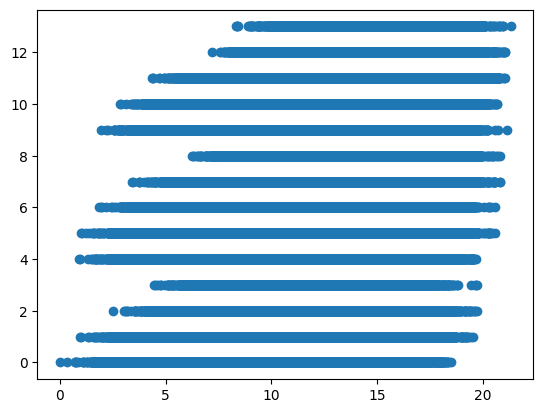

In [23]:
"""
Figura 2. Relació entre l’increment de cost entre l’escenari base i l’escenari de millora simulat (cost diferencial, en M€) 
i la reducció en el nombre d’incompliments. 
"""
x = []
y = []
for configuracio in configuracions:
    cost_diferencial = configuracio['Cost diferencial']
    n_incompliments = configuracio['Nombre incompliments'] 
    x.append(cost_diferencial / 1000000)
    y.append(incompliments_escenari_base - n_incompliments)
    
plt.scatter(x, y)
plt.show() 

In [24]:
pd.DataFrame({'Cost diferencial (M€)': x, 'Reducció nombre incompliments': y}) 

,Cost diferencial,Nombre incompliments
0,8.317053,13
1,8.360992,13
2,8.387467,13
3,8.431406,13
4,8.877753,13
...,...,...
1123630,18.299779,0
1123631,18.313220,0
1123632,18.356321,0
1123633,18.370193,0


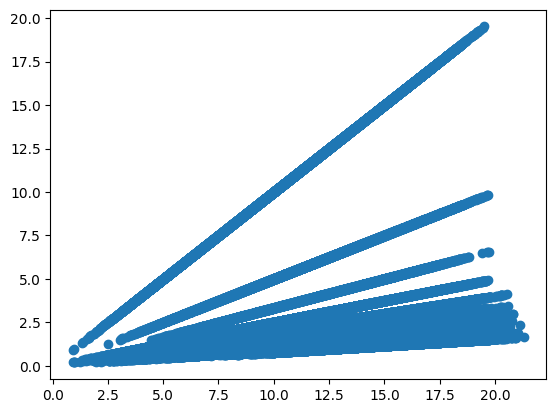

In [25]:
"""
Figura 3. Relació entre l’increment de cost entre l’escenari base i l’escenari de millora simulat (cost diferencial, en M€) 
i el quocient entre el cost diferencial i la reducció en el nombre d’incompliments. 
"""
x = []
y = []
for configuracio in configuracions:
    cost_diferencial = configuracio['Cost diferencial']
    n_incompliments = configuracio['Nombre incompliments']
    if n_incompliments < incompliments_escenari_base:
        x.append(cost_diferencial / 1000000)
        y.append((cost_diferencial / 1000000) / (incompliments_escenari_base - n_incompliments))
    
plt.scatter(x, y)
plt.show() 

In [26]:
pd.DataFrame({'Cost diferencial (M€)': x, 'Cost unitari reducció incompliments (M€)': y}) 

,Cost diferencial (M€),Cost unitari reducció incompliments (M€)
0,8.317053,0.639773
1,8.360992,0.643153
2,8.387467,0.645190
3,8.431406,0.648570
4,8.877753,0.682904
...,...,...
1075229,19.229701,19.229701
1075230,19.303251,19.303251
1075231,19.318549,19.318549
1075232,19.445432,19.445432


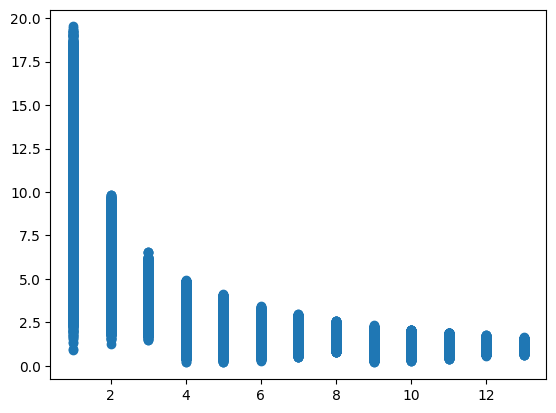

In [27]:
"""
Figura 4. Relació entre la reducció en el nombre d’incompliments i el quocient entre el cost diferencial 
i la reducció en el nombre d’incompliments (cost unitari reducció). 
"""
x = []
y = []
for configuracio in configuracions:
    cost_diferencial = configuracio['Cost diferencial']
    n_incompliments = configuracio['Nombre incompliments']
    
    if n_incompliments < incompliments_escenari_base:
        x.append(incompliments_escenari_base - n_incompliments)
        y.append((cost_diferencial / 1000000) / (incompliments_escenari_base - n_incompliments))
    
plt.scatter(x, y)
plt.show()

In [28]:
pd.DataFrame({"Reducció nombre d'incompliments": x, 'Cost unitari reducció incompliments (M€)': y}) 

,Reducció nombre d'incompliments,Cost unitari reducció incompliments (M€)
0,13,0.639773
1,13,0.643153
2,13,0.645190
3,13,0.648570
4,13,0.682904
...,...,...
1075229,1,19.229701
1075230,1,19.303251
1075231,1,19.318549
1075232,1,19.445432
